<a href="https://colab.research.google.com/github/rebeccalizaverghese/IBM-Data-Science/blob/main/9.7_Applied_Data_Science_Capstones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Applied Data Science Capstones**
#### **Exploratory Data Analysis (EDA)**

**EDA Using SQL**

In [1]:
!pip install sqlalchemy==1.3.9

In [2]:
!pip install ipython-sql
!pip install ipython-sql prettytable
%load_ext sql

  Using cached SQLAlchemy-2.0.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.7 kB)
Using cached SQLAlchemy-2.0.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [3]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'
con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [10]:
%sql sqlite:///my_data1.db

In [11]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [12]:
# Drop tables if exist
%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [13]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

In [15]:
%sql select * from SPACEXTABLE limit 3;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt


**Tasks**

Task 1
Display the names of the unique launch sites in the space mission

In [19]:
%sql select distinct Launch_Site from SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


Task 2
Display 5 records where launch sites begin with the string 'CCA'

In [21]:
%sql select * from SPACEXTABLE where Launch_Site like "%CCA%" limit 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


Task 3
Display the total payload mass carried by boosters launched by NASA (CRS)

In [25]:
%sql select sum(PAYLOAD_MASS__KG_) from SPACEXTABLE where Customer = "NASA (CRS)";

 * sqlite:///my_data1.db
Done.


sum(PAYLOAD_MASS__KG_)
45596


Task 4
Display average payload mass carried by booster version F9 v1.1

In [27]:
%sql select avg(PAYLOAD_MASS__KG_) from SPACEXTABLE where Booster_Version ='F9 v1.1';

 * sqlite:///my_data1.db
Done.


avg(PAYLOAD_MASS__KG_)
2928.4


Task 5
List the date when the first succesful landing outcome in ground pad was acheived.

In [28]:
%sql select min(Date) from SPACEXTABLE where Landing_Outcome = "Success (ground pad)";

 * sqlite:///my_data1.db
Done.


min(Date)
2015-12-22


Task 6
List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000

In [29]:
%sql select * from SPACEXTABLE where Landing_Outcome = "Success (drone ship)" and PAYLOAD_MASS__KG_ >4000 <6000;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2016-04-08,20:43:00,F9 FT B1021.1,CCAFS LC-40,SpaceX CRS-8,3136,LEO (ISS),NASA (CRS),Success,Success (drone ship)
2016-05-06,5:21:00,F9 FT B1022,CCAFS LC-40,JCSAT-14,4696,GTO,SKY Perfect JSAT Group,Success,Success (drone ship)
2016-05-27,21:39:00,F9 FT B1023.1,CCAFS LC-40,Thaicom 8,3100,GTO,Thaicom,Success,Success (drone ship)
2016-08-14,5:26:00,F9 FT B1026,CCAFS LC-40,JCSAT-16,4600,GTO,SKY Perfect JSAT Group,Success,Success (drone ship)
2017-01-14,17:54:00,F9 FT B1029.1,VAFB SLC-4E,Iridium NEXT 1,9600,Polar LEO,Iridium Communications,Success,Success (drone ship)
2017-03-30,22:27:00,F9 FT B1021.2,KSC LC-39A,SES-10,5300,GTO,SES,Success,Success (drone ship)
2017-06-23,19:10:00,F9 FT B1029.2,KSC LC-39A,BulgariaSat-1,3669,GTO,Bulsatcom,Success,Success (drone ship)
2017-06-25,20:25:00,F9 FT B1036.1,VAFB SLC-4E,Iridium NEXT 2,9600,LEO,Iridium Communications,Success,Success (drone ship)
2017-08-24,18:51:00,F9 FT B1038.1,VAFB SLC-4E,Formosat-5,475,SSO,NSPO,Success,Success (drone ship)
2017-10-09,12:37:00,F9 B4 B1041.1,VAFB SLC-4E,Iridium NEXT 3,9600,Polar LEO,Iridium Communications,Success,Success (drone ship)


Task 7
List the total number of successful and failure mission outcomes

In [33]:
%sql select count(Mission_Outcome) from SPACEXTABLE where Mission_Outcome like "Success%";

 * sqlite:///my_data1.db
Done.


count(Mission_Outcome)
100


In [34]:
%sql select count(Mission_Outcome) from SPACEXTABLE where Mission_Outcome like "Failure%";

 * sqlite:///my_data1.db
Done.


count(Mission_Outcome)
1


Task 8
List the names of the booster_versions which have carried the maximum payload mass. Use a subquery

In [35]:
%sql select Booster_Version from SPACEXTABLE where PAYLOAD_MASS__KG_ = (select max(PAYLOAD_MASS__KG_) from SPACEXTABLE);

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


Task 9
List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.

In [40]:
%sql select substr(Date, 6,2) as Month, Landing_Outcome, Booster_Version, Launch_Site \
from SPACEXTABLE where substr(Date,0,5)="2015" and Landing_Outcome = "Failure (drone ship)";

 * sqlite:///my_data1.db
Done.


Month,Landing_Outcome,Booster_Version,Launch_Site
01,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
04,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


Task 10
Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.

In [41]:
%sql select Landing_Outcome, count(Landing_Outcome) as Count from SPACEXTABLE \
where Date between '2010-06-04' and '2017-03-20' \
group by Landing_Outcome order by Count desc;

 * sqlite:///my_data1.db
Done.


Landing_Outcome,Count
No attempt,10
Success (drone ship),5
Failure (drone ship),5
Success (ground pad),3
Controlled (ocean),3
Uncontrolled (ocean),2
Failure (parachute),2
Precluded (drone ship),1


#### **EDA Using Pandas and Matplotlib**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Read the data
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


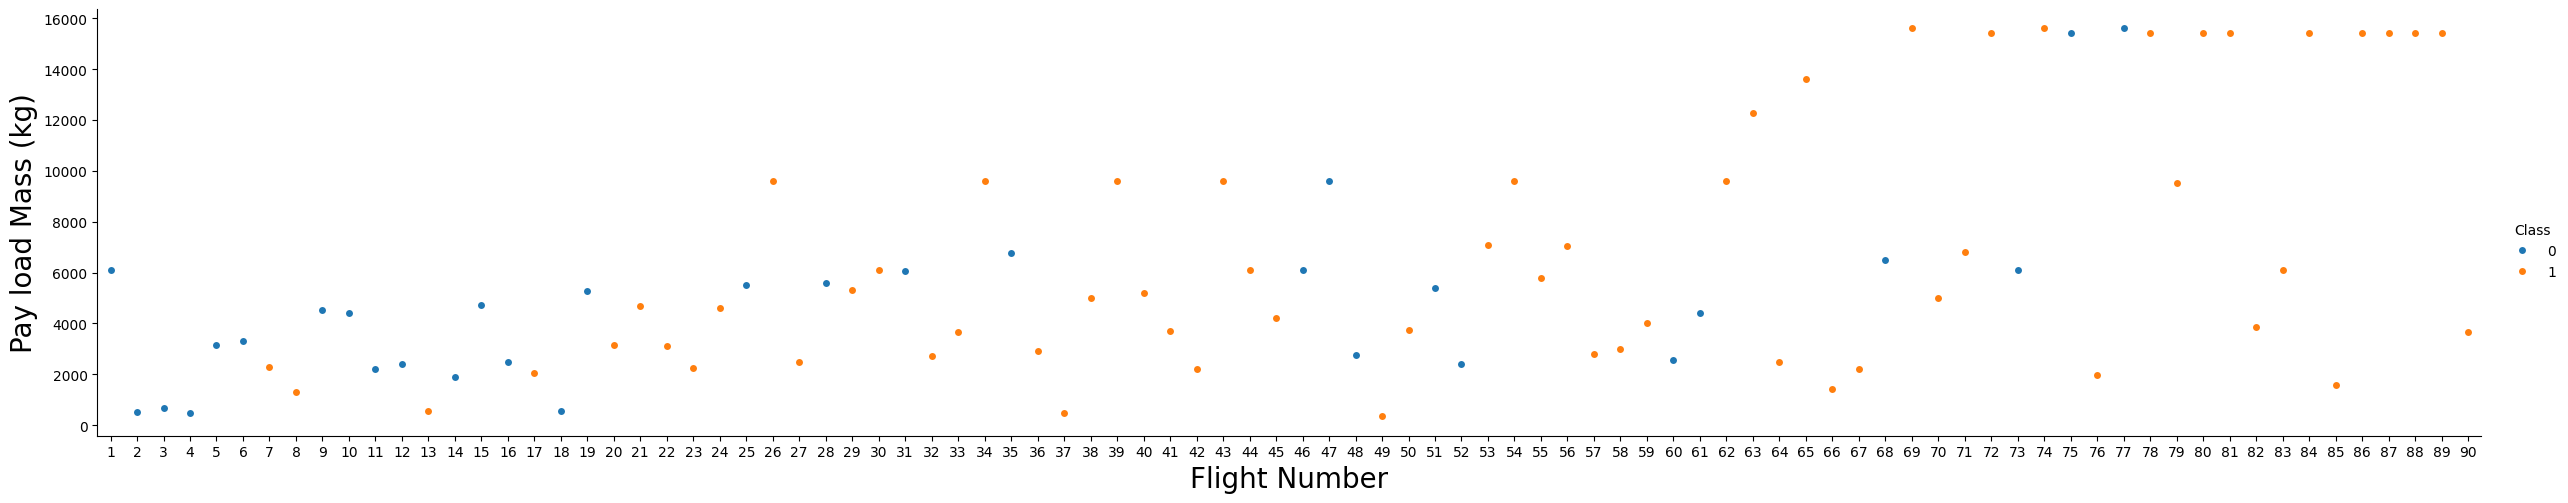

In [46]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

TASK 1: Visualize the relationship between Flight Number and Launch Site

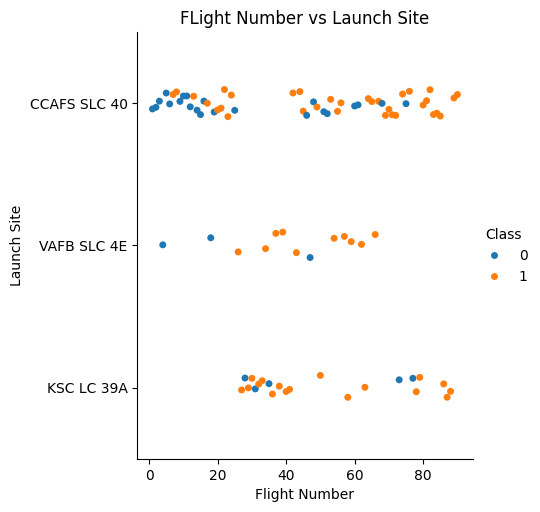

In [48]:
sns.catplot(x='FlightNumber', y='LaunchSite', data=df, hue='Class')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.title('FLight Number vs Launch Site')
plt.show()

TASK 2: Visualize the relationship between Payload Mass and Launch Site

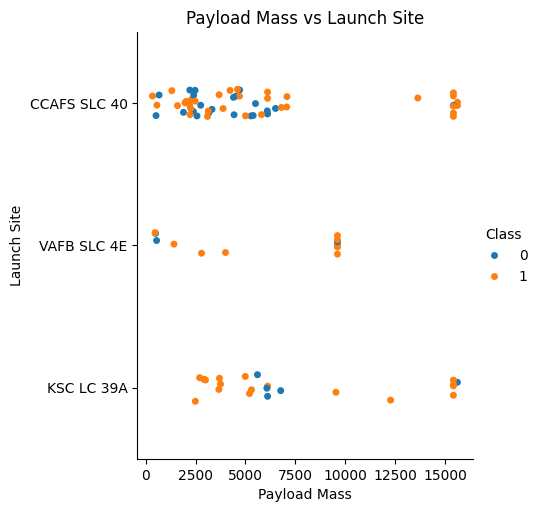

In [49]:
sns.catplot(x='PayloadMass', y='LaunchSite', data=df, hue='Class')
plt.xlabel('Payload Mass')
plt.ylabel('Launch Site')
plt.title('Payload Mass vs Launch Site')
plt.show()

Interpretation: By observing the Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

TASK 3: Visualize the relationship between success rate of each orbit type

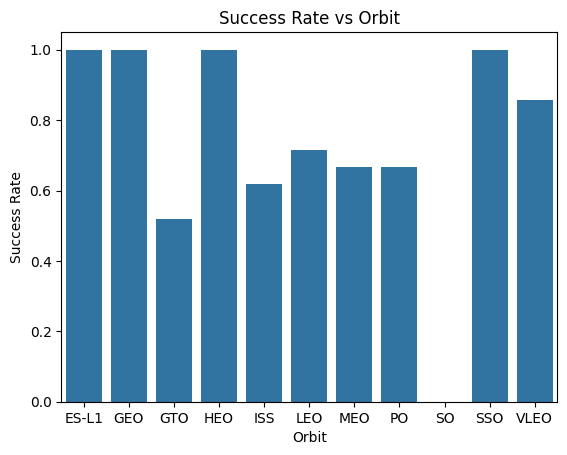

In [51]:
# Calculate the mean of 'Class' for each 'Orbit'
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Plot the data
sns.barplot(x='Orbit', y='Class', data=orbit_success_rate)
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.title('Success Rate vs Orbit')
plt.show()

TASK 4: Visualize the relationship between FlightNumber and Orbit type

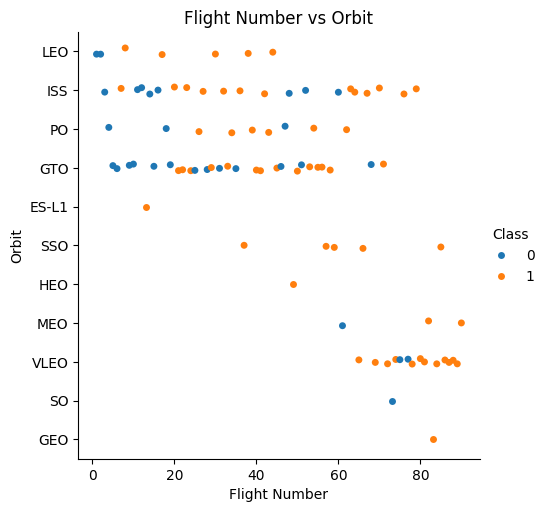

In [53]:
sns.catplot(x='FlightNumber', y='Orbit', data=df, hue="Class")
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.title('Flight Number vs Orbit')
plt.show()

Interpretation: It can be observed that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success


TASK 5: Visualize the relationship between Payload Mass and Orbit type

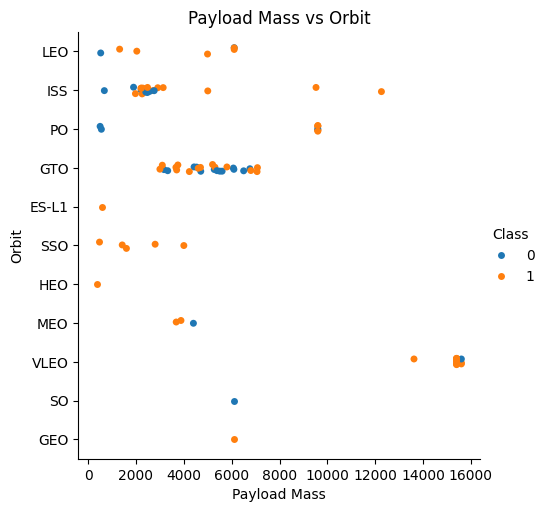

In [54]:
sns.catplot(x='PayloadMass', y='Orbit', data=df, hue="Class")
plt.xlabel('Payload Mass')
plt.ylabel('Orbit')
plt.title('Payload Mass vs Orbit')
plt.show()

TASK 6: Visualize the launch success yearly trend

In [55]:
# A function to Extract years from the date
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


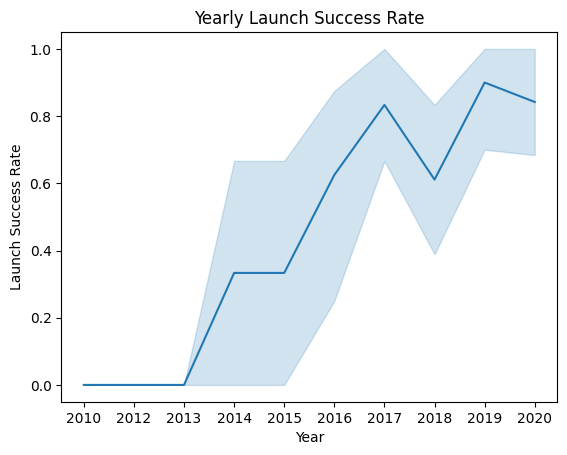

In [56]:
sns.lineplot(x='Date', y='Class', data=df)
plt.xlabel('Year')
plt.ylabel('Launch Success Rate')
plt.title('Yearly Launch Success Rate')
plt.show()

Interpretation: We can observe that the sucess rate since 2013 kept increasing till 2020

##### **Feature Engineering**

In [64]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [66]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


TASK 8: Cast all numeric columns to float64

In [67]:
features_one_hot.astype('float64').head(3)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
